In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
os.chdir( "C:/Users/Miray/Desktop")
os.getcwd()


'C:\\Users\\Miray\\Desktop'

In [2]:
# Bad:1= Temmerüde düşme(kötü müşteri zamanında ödeyememiş), 0= Temmerüde düşmeme (iyi müşteri zamanında ödemiş)
# Loan= Kredi talep tutarı
# Mortdue= Mevcut ipoteğe ödenecek tutar
# Value= Mevcut müşkün değeri
# Reason= debt/homelmp
# Job= Müşteri meslek tipi
# Yoj= years at the present job
# Derog=Kötü raporlama sayısı
# Delinq= Ödenmemiş kredi limiti sayısı
# Clage= Onaylanan en eski kredi yaşı
# Ninq= Son kredi limiti sayısı
# Clno: Kredi Limiti Sayısı
# Debtinc=Borç/Gelir

In [3]:
finans=pd.read_csv("finans.csv")

In [4]:
finans.bad=pd.Categorical(finans.bad)

In [5]:
finans.dtypes

bad        category
loan          int64
mortdue     float64
value       float64
reason       object
job          object
yoj         float64
derog       float64
delinq      float64
clage       float64
ninq        float64
clno        float64
debtinc     float64
dtype: object

In [6]:
finans.shape

(3576, 13)

In [7]:
finans.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
bad,3576,2,0,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,3576,NaN,NaN,NaN,18529.7,11262.8,1100,11000,16200,23100,89900
mortdue,3262,NaN,NaN,NaN,74013.9,44016.8,2619,46700.2,65858,91717,399550
value,3512,NaN,NaN,NaN,101077,54865.3,8800,65753,89183,118928,850000
reason,3429,2,DebtCon,2371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,3409,6,Other,1431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yoj,3264,NaN,NaN,NaN,8.83264,7.56805,0,3,7,13,41
derog,3149,NaN,NaN,NaN,0.26167,0.865178,0,0,0,0,10
delinq,3225,NaN,NaN,NaN,0.432558,1.09923,0,0,0,0,15
clage,3397,NaN,NaN,NaN,179.833,87.0662,0.49,115.6,173.64,230.71,1168.23


In [8]:
pd.crosstab(index=finans["bad"],columns="count")

col_0,count
bad,
0,2863
1,713


In [9]:
finans.isnull().sum().rename_axis('Değişkenler').reset_index(name='Kayıp Veriler')

,Değişkenler,Kayıp Veriler
0,bad,0
1,loan,0
2,mortdue,314
3,value,64
4,reason,147
5,job,167
6,yoj,312
7,derog,427
8,delinq,351
9,clage,179


In [10]:
finans.dropna(axis=0, how='any', inplace=True)

In [11]:
finans.isnull().values.any()

False

In [12]:
pd.crosstab(index=finans["bad"],columns="count")

col_0,count
bad,
0,1840
1,178


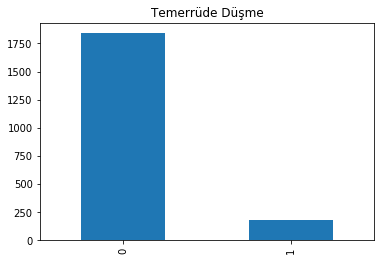

In [13]:
finans["bad"].value_counts().plot.bar(title='Temerrüde Düşme')

In [14]:
kat_finans=finans.select_dtypes(include=["object"])
kat_finans.head()

,reason,job
153,DebtCon,Mgr
154,DebtCon,Mgr
155,DebtCon,Mgr
156,HomeImp,Mgr
157,DebtCon,Mgr


In [15]:
kat_finans.reason.unique()

array(['DebtCon', 'HomeImp'], dtype=object)

In [16]:
kat_finans.job.unique()

array(['Mgr', 'Office', 'Other', 'ProfEx', 'Sales', 'Self'], dtype=object)

Text(0.5, 1.0, 'Krediyi Kullanma Nedeni')

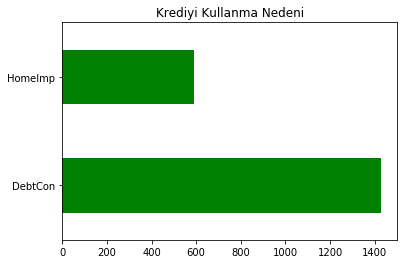

In [17]:
finans["reason"].value_counts().plot.barh(color = "green").set_title("Krediyi Kullanma Nedeni")

Text(0.5, 1.0, 'Meslek')

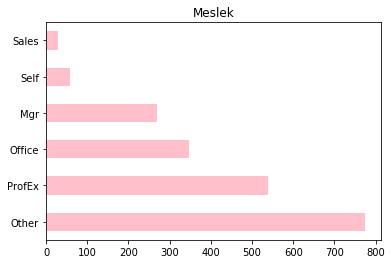

In [18]:
finans["job"].value_counts().plot.barh(color = "pink").set_title("Meslek")


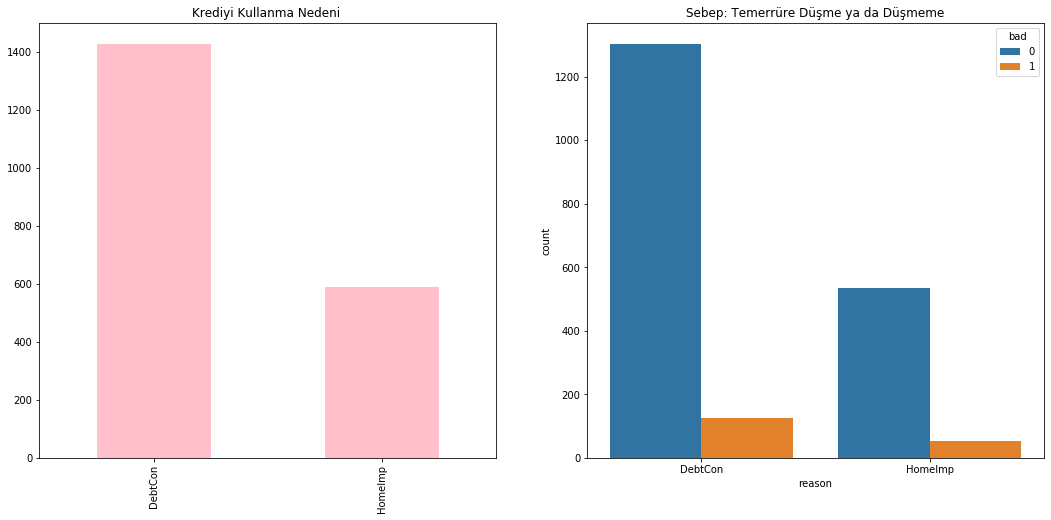

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.countplot("reason", hue = "bad", data = finans, ax = ax[1])
finans["reason"].value_counts().plot.bar(color = "pink", ax = ax[0])
ax[0].set_title("Krediyi Kullanma Nedeni ")
ax[1].set_title("Sebep: Temerrüre Düşme ya da Düşmeme")
plt.show()

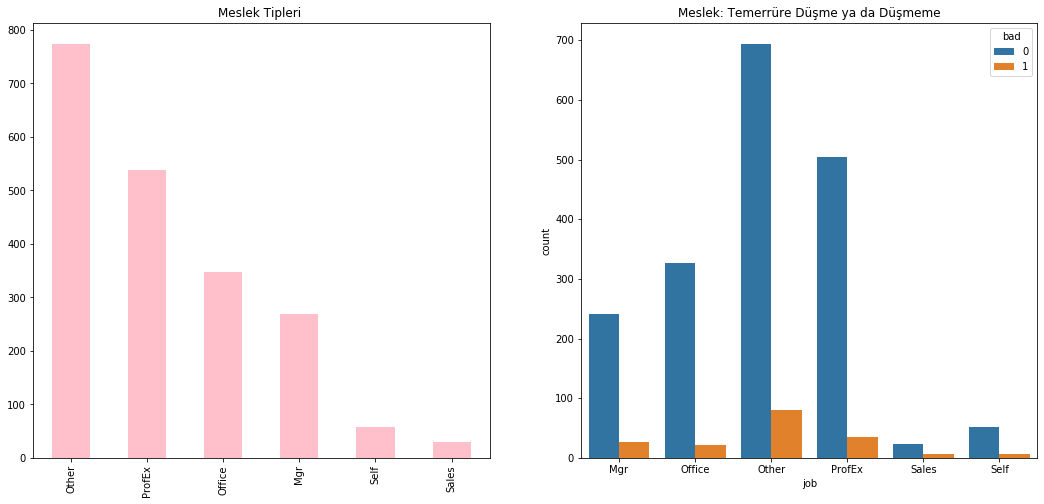

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.countplot("job", hue = "bad",data = finans, ax = ax[1])
finans["job"].value_counts().plot.bar(color = "pink", ax = ax[0])
ax[0].set_title("Meslek Tipleri ")
ax[1].set_title("Meslek: Temerrüre Düşme ya da Düşmeme")
plt.show()

In [21]:
pd.crosstab([finans["reason"], finans["bad"]],finans["job"],margins = True).style.background_gradient(cmap ="summer_r")


In [22]:
pd.crosstab([finans["reason"], finans["bad"]],finans["job"],normalize='columns').style.background_gradient(cmap ="summer_r")

In [23]:
#chisuare...

In [24]:
import seaborn as sns

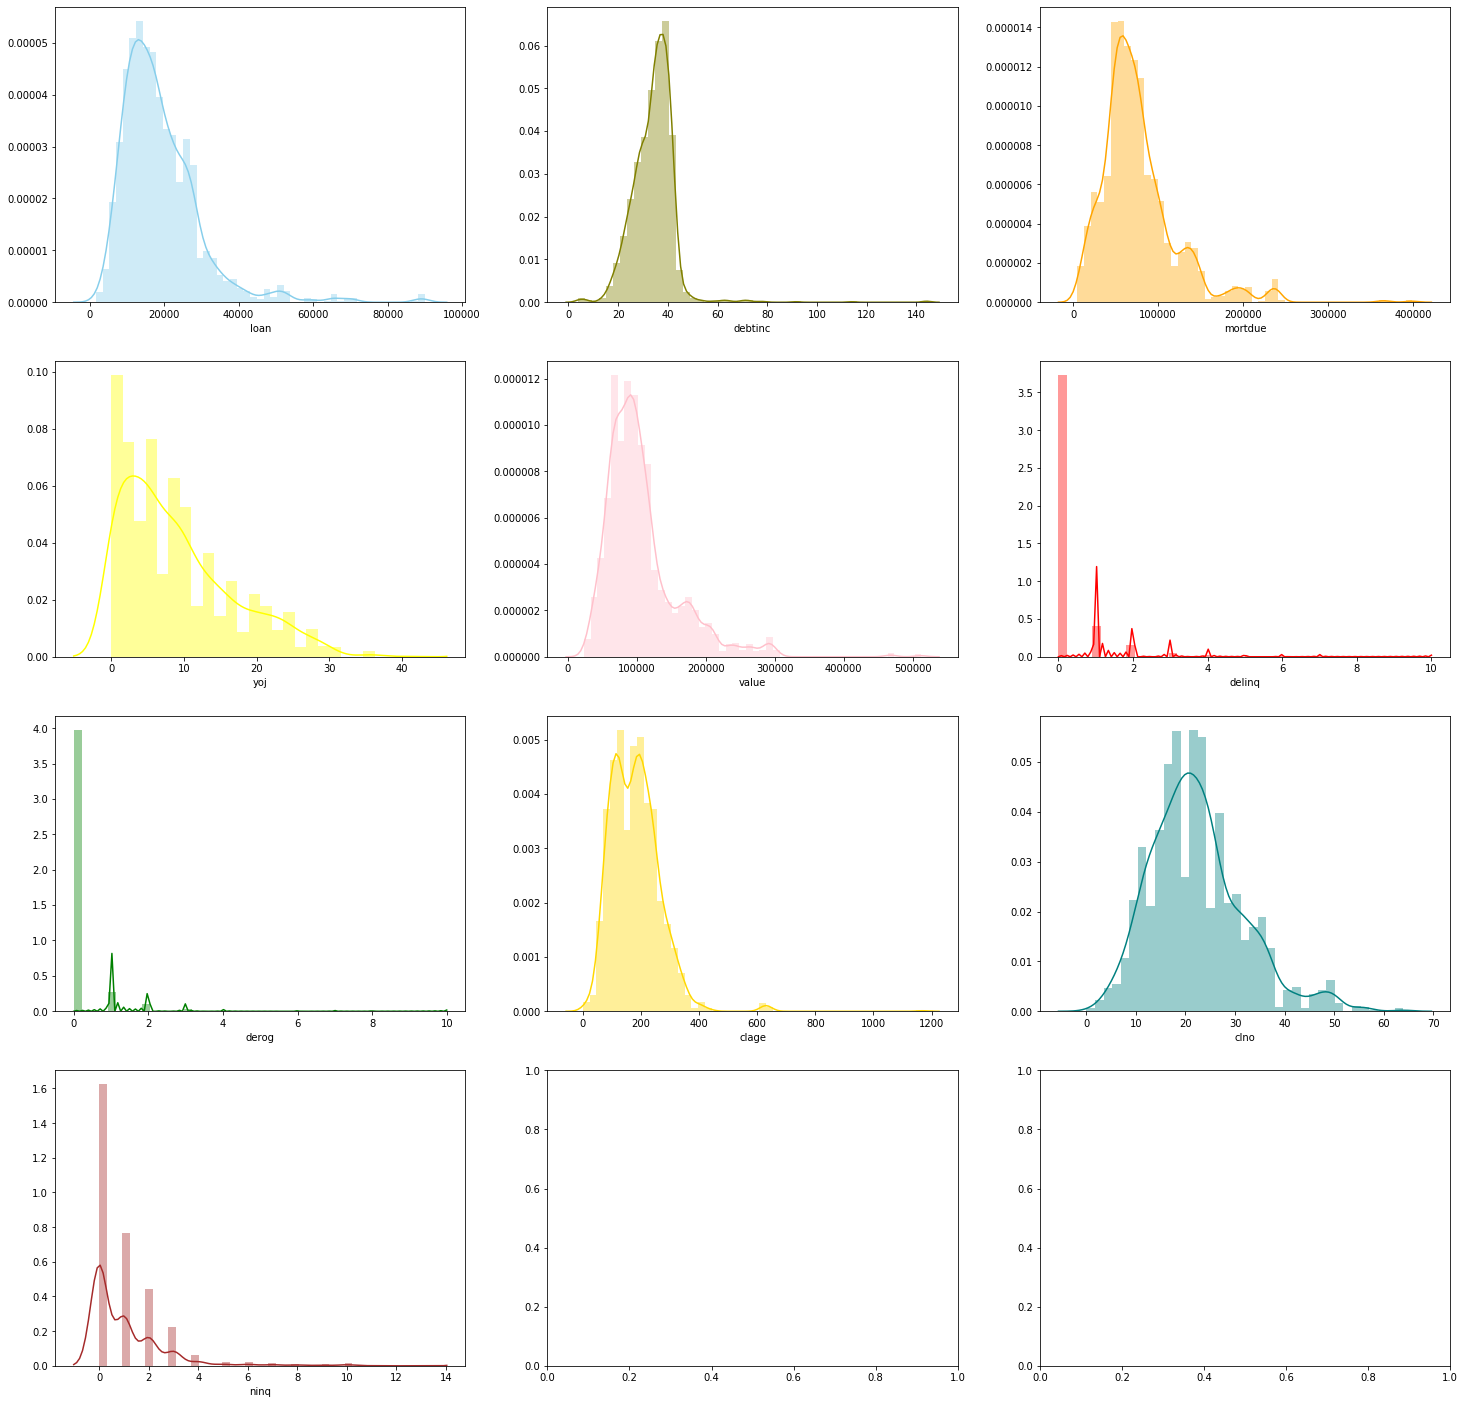

In [25]:
f, axes = plt.subplots(4, 3, figsize=(25,25))
sns.distplot( finans["loan"] , color="skyblue", ax=axes[0, 0])
sns.distplot( finans["debtinc"] , color="olive", ax=axes[0, 1])
sns.distplot( finans["mortdue"] , color="orange", ax=axes[0, 2])
sns.distplot( finans["yoj"] , color="yellow", ax=axes[1, 0])
sns.distplot( finans["value"] , color="pink", ax=axes[1, 1])
sns.distplot( finans["delinq"] , color="red", ax=axes[1, 2])
sns.distplot( finans["derog"] , color="green", ax=axes[2, 0])
sns.distplot( finans["clage"] , color="gold", ax=axes[2, 1])
sns.distplot( finans["clno"] , color="teal", ax=axes[2, 2])
sns.distplot( finans["ninq"], color="brown", ax=axes[3, 0])


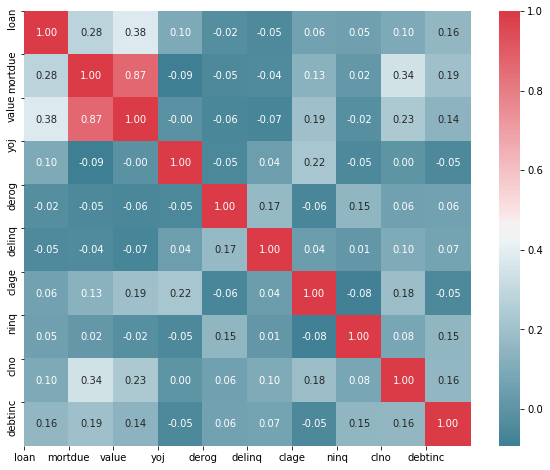

In [26]:
#Create Correlation matrix
corr = finans.corr()
fig, ax = plt.subplots(figsize=(10,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show() 


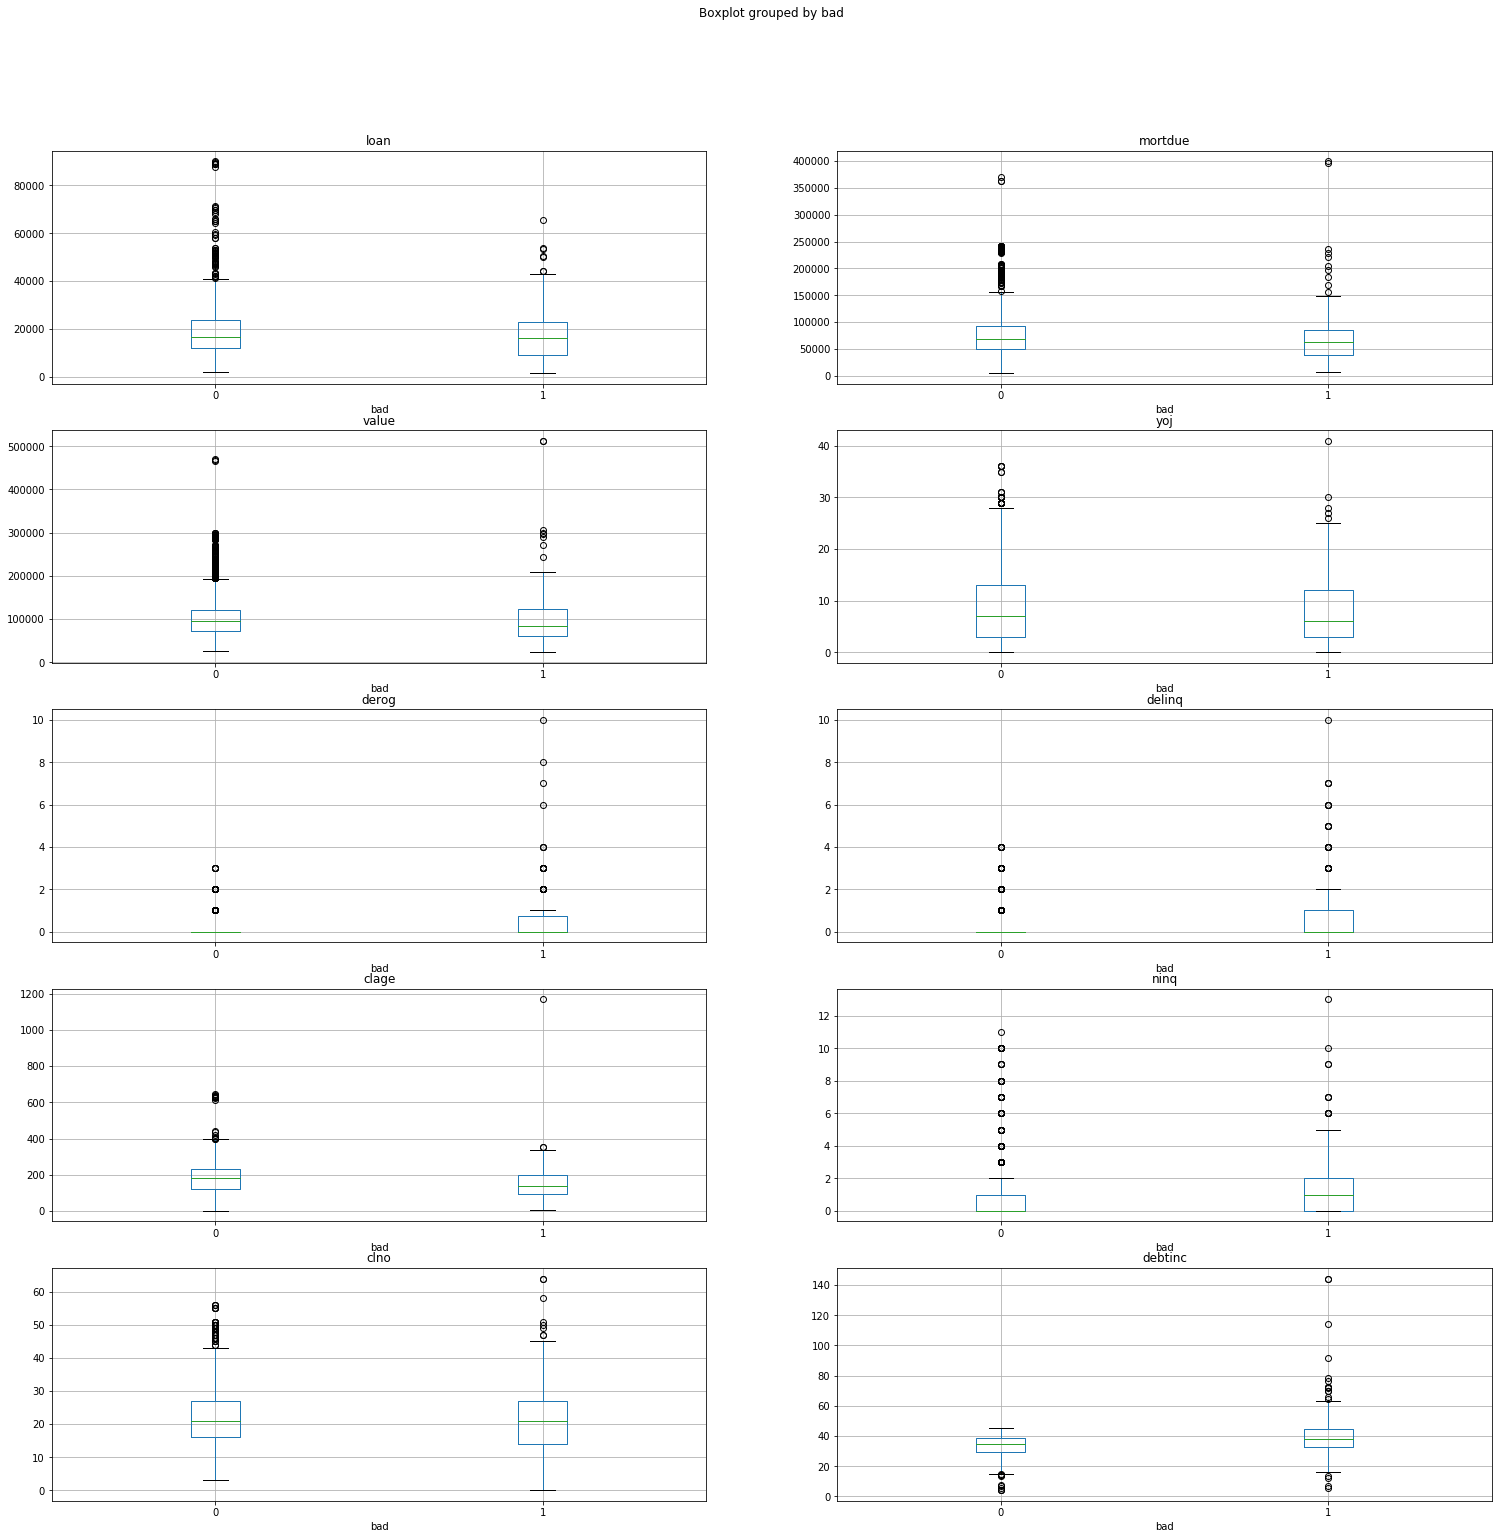

In [27]:
# boxplot, quartile'ler aracılığıyla bize bilgi sunar. [min-0.25-0.50(median)-0.75-max] ve aykırı gözlemler.. Aykırı gözlemler soldaysa sola çarpık, sağdaysa sağa çarpık..
f, axes = plt.subplots(5, 2, figsize=(25,25))
finans.boxplot(column="loan", by='bad', ax=axes[0, 0] )
finans.boxplot(column="mortdue", by='bad',ax=axes[0, 1])
finans.boxplot(column="value", by='bad', ax=axes[1, 0])
finans.boxplot(column="yoj", by='bad', ax=axes[1, 1])
finans.boxplot(column="derog", by='bad',ax=axes [2, 0])
finans.boxplot(column="delinq", by='bad', ax=axes[2, 1])
finans.boxplot(column="clage", by='bad',ax=axes[3, 0] )
finans.boxplot(column="ninq", by='bad',ax=axes[3, 1])
finans.boxplot(column="clno", by='bad',ax=axes[4, 0])
finans.boxplot(column="debtinc", by='bad',ax=axes[4, 1])

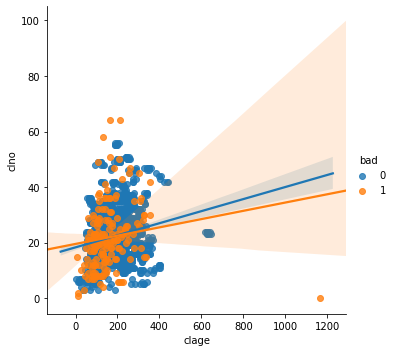

In [28]:
sns.lmplot(x="clage", y="clno", hue="bad", data=finans) # clage ve clno arasındaki ilişkinin şiddeti bad=0'da daha güçlü. bad=1'de çok sapma var

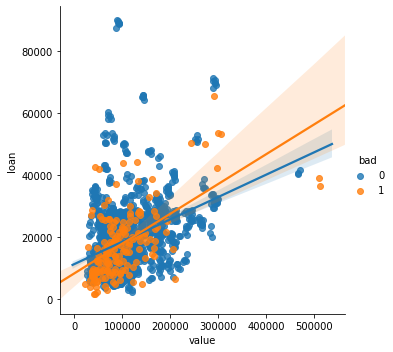

In [29]:
sns.lmplot(x="value", y="loan", hue="bad", data=finans) #doğrusal ilişkinin gösterilmesi mortdue ve value arasındaki ilişkinin şiddeti, bad=1 kötü müşteride daha güçlü ve çok sapma var.

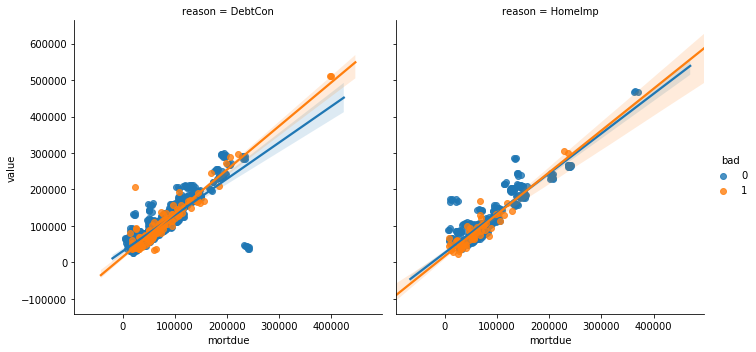

In [30]:
sns.lmplot(x="mortdue", y="value", hue="bad",col= "reason", data=finans) #mevcut ipoteğe ödenecek tutar ile, mevcut mülkün değeri bad=0-1'de ve reason=Homelmp'de şiddetli bir ilişkide,0-1 arasında anlamlı bir fark gözlemlenememiş gibi. 

In [31]:
grps=pd.unique(finans.bad.values)
dict={
                'loan':'loan',
                'mortdue':'mortdue',
                'value':'value',
                'yoj':'yoj',
                'derog':'derog',
                'delinq':'delinq',
                'clage':'clage',
                'ninq':'ninq',
                'clno':'clno',
                'debtinc':'debtinc'
                
         }

In [32]:
from scipy import stats
import scipy.stats as st
from scipy.stats import shapiro
from scipy.stats import levene 

In [33]:
#Shapiro-Wilks Test#
#h0: Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)
#h1: Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)
#her parametrenin bad column 0-1 degeri icin normal dağılımına bakıyoruz. 
for key in dict:
    for i in grps:
            stat,p=shapiro(finans[dict[key]][finans['bad']==i])
            alpha=0.05 #kabul edilebilir hata miktarıdır.
            if(p>alpha):
                print(dict[key],i,"-->Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0) ", "Statistics=%.3f, p=%.3f" % (stat,p))
            else:
                 print(dict[key],i,"-->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) " ,"Statistics=%.3f, p=%.3f" % (stat,p)) 

loan 0 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)  Statistics=0.825, p=0.000
loan 1 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)  Statistics=0.904, p=0.000
mortdue 0 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)  Statistics=0.876, p=0.000
mortdue 1 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)  Statistics=0.753, p=0.000
value 0 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)  Statistics=0.857, p=0.000
value 1 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)  Statistics=0.735, p=0.000
yoj 0 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)  Statistics=0.914, p=0.000
yoj 1 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)  Statistics=0.877, p=0.000
derog 0 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)  Statistics=0.299, p=0.000
derog 1 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)  Statisti

In [34]:
# Örneklem normal dağılımdan gelmiyor. Nonparametrik..

In [35]:
import statsmodels.formula.api as smf 

In [36]:
# Levene: Varyanslar homojen mi ?
# H0: Varyanslar homojendir. (All of the k sample populations have equal variances)
# H1: Varyanslar homojen değildir.( At least one of the k sample population variances are not equal.)
for key in dict: 
    for i in grps:
            stat,p=levene(finans[dict[key]][finans['bad'] == 0], finans[dict[key]][finans['bad'] == 1])
            alpha=0.05
            if(p>alpha):
                print(dict[key],i,"--> varyans homojendir. Fail to Reject H0", "Statistics=%.3f, p=%.3f" % (stat,p))
            else:
                print(dict[key],i," --> varyans homojen degildir. Reject H0", "Statistics=%.3f, p=%.3f" % (stat,p))
                

loan 0 --> varyans homojendir. Fail to Reject H0 Statistics=2.395, p=0.122
loan 1 --> varyans homojendir. Fail to Reject H0 Statistics=2.395, p=0.122
mortdue 0 --> varyans homojendir. Fail to Reject H0 Statistics=2.307, p=0.129
mortdue 1 --> varyans homojendir. Fail to Reject H0 Statistics=2.307, p=0.129
value 0  --> varyans homojen degildir. Reject H0 Statistics=3.991, p=0.046
value 1  --> varyans homojen degildir. Reject H0 Statistics=3.991, p=0.046
yoj 0  --> varyans homojen degildir. Reject H0 Statistics=4.210, p=0.040
yoj 1  --> varyans homojen degildir. Reject H0 Statistics=4.210, p=0.040
derog 0  --> varyans homojen degildir. Reject H0 Statistics=118.586, p=0.000
derog 1  --> varyans homojen degildir. Reject H0 Statistics=118.586, p=0.000
delinq 0  --> varyans homojen degildir. Reject H0 Statistics=172.844, p=0.000
delinq 1  --> varyans homojen degildir. Reject H0 Statistics=172.844, p=0.000
clage 0 --> varyans homojendir. Fail to Reject H0 Statistics=0.008, p=0.927
clage 1 --> 

In [37]:
#loan-mortdue ve clage varyansları homojendir. 
#value-yoj-derog-delinq-ninq-clno-debtinc varyansları homojen değildir.

In [38]:
bad = finans[finans['bad'] == 1]
good = finans[finans['bad'] == 0]

In [39]:
test_istatistigi, pvalue= stats.ttest_ind(bad.loan, good.loan, equal_var = True)
print('Test İstatistiği= %.4f, p-degeri = %.4f' % (test_istatistigi, pvalue))  #ilişki anlamsızdır.

Test İstatistiği= -1.1761, p-degeri = 0.2397


In [40]:
test_istatistigi, pvalue=stats.ttest_ind(bad.mortdue, good.mortdue, equal_var = True)
print('Test İstatistiği= %.4f, p-degeri = %.4f' % (test_istatistigi, pvalue)) #ilişki anlamsızdır.

Test İstatistiği= -1.1275, p-degeri = 0.2597


In [41]:
test_istatistigi, pvalue= stats.ttest_ind(bad.clage, good.clage, equal_var = True)
print('Test İstatistiği= %.4f, p-degeri = %.4f' % (test_istatistigi, pvalue)) #ilişki anlamlıdır.

Test İstatistiği= -4.0952, p-degeri = 0.0000


In [42]:
test_istatistigi, pvalue=stats.ttest_ind(bad.value, good.value, equal_var = False)
print('Test İstatistiği= %.4f, p-degeri = %.4f' % (test_istatistigi, pvalue)) #ilişki anlamsızdır.

Test İstatistiği= -1.1224, p-degeri = 0.2631


In [43]:
test_istatistigi, pvalue=stats.ttest_ind(bad.yoj, good.yoj, equal_var = False)
print('Test İstatistiği= %.4f, p-degeri = %.4f' % (test_istatistigi, pvalue)) #ilişki anlamlıdır.

Test İstatistiği= -2.4810, p-degeri = 0.0138


In [44]:
test_istatistigi, pvalue=stats.ttest_ind(bad.derog, good.derog, equal_var = False)
print('Test İstatistiği= %.4f, p-degeri = %.4f' % (test_istatistigi, pvalue)) #ilişki anlamlıdır.

Test İstatistiği= 4.5012, p-degeri = 0.0000


In [45]:
test_istatistigi, pvalue=stats.ttest_ind(bad.delinq, good.delinq, equal_var = False)
print('Test İstatistiği= %.4f, p-degeri = %.4f' % (test_istatistigi, pvalue)) #ilişki anlamlıdır.

Test İstatistiği= 5.8198, p-degeri = 0.0000


In [46]:
test_istatistigi, pvalue=stats.ttest_ind(bad.ninq, good.ninq, equal_var = False)
print('Test İstatistiği= %.4f, p-degeri = %.4f' % (test_istatistigi, pvalue)) #ilişki anlamlıdır.

Test İstatistiği= 3.5941, p-degeri = 0.0004


In [47]:
test_istatistigi, pvalue=stats.ttest_ind(bad.clno, good.clno, equal_var = False)
print('Test İstatistiği= %.4f, p-degeri = %.4f' % (test_istatistigi, pvalue)) #ilişki anlamsızdır.

Test İstatistiği= -0.4677, p-degeri = 0.6405


In [48]:
test_istatistigi, pvalue= stats.ttest_ind(bad.debtinc, good.debtinc, equal_var = False)
print('Test İstatistiği= %.4f, p-degeri = %.4f' % (test_istatistigi, pvalue)) #ilişki anlamlıdır.


Test İstatistiği= 5.6088, p-degeri = 0.0000


In [49]:
#Korelasyon anlamlılığı testleri:
#Ho: Aralarında bir korelasyon vardır..
    #Hı: Aralarında bir korelasyon yoktur..
        #Normal dağılıma uyuyorlarsa--> pearson, uyumuyorlarsa spearman yapılır.

In [50]:
shapiro(finans["value"])
print('Statistics=%.3f, p=%.3f' % (stat,p)) 

Statistics=115.704, p=0.000


In [51]:
shapiro(finans["mortdue"])
print('Statistics=%.3f, p=%.3f' % (stat,p)) 

Statistics=115.704, p=0.000


In [52]:
finans["mortdue"].corr(finans["value"], method="spearman")

0.853690419380716

In [53]:
finans["mortdue"].corr(finans["value"], method="pearson")

0.8673681237221051

In [54]:
stats.spearmanr(finans["mortdue"],finans["value"])
alpha=0.05
if(p>alpha):
    print('Statistics=%.3f, p=%.3f' % (stat,p), 'aralarındaki bu ilişki anlamsızdır') 
else:
    print('Statistics=%.3f, p=%.3f' % (stat,p), 'aralarında bir ilişki vardır ve bu ilişki anlamlıdır') 


Statistics=115.704, p=0.000 aralarında bir ilişki vardır ve bu ilişki anlamlıdır


In [55]:
finans["mortdue"][finans['bad'] == 1].corr(finans["value"][finans['bad'] == 1],method="spearman")

0.8734159707807718

In [56]:
finans["mortdue"][finans['bad'] == 0].corr(finans["value"][finans['bad'] == 0],method="spearman")

0.8497729850514637

In [57]:
stats.levene(finans["value"],finans["mortdue"])
print('Statistics=%.3f, p=%.3f' % (stat,p))   

Statistics=115.704, p=0.000


In [58]:
test_istatistigi, pvalue= stats.ttest_ind(finans["value"],finans["mortdue"], equal_var = False)
print('Test İstatistiği= %.4f, p-degeri = %.4f' % (test_istatistigi, pvalue))  

Test İstatistiği= 19.6191, p-degeri = 0.0000


In [59]:
test_istatistigi, pvalue= stats.ttest_ind(finans["value"],finans["mortdue"], equal_var = False)
print('Test İstatistiği= %.4f, p-degeri = %.4f' % (test_istatistigi, pvalue)) 

Test İstatistiği= 19.6191, p-degeri = 0.0000


In [60]:
#value ve loan bad=1'de yüksek bir korelasyona sahip mi?

In [61]:
finans["value"][finans['bad'] == 1].corr(finans["loan"][finans['bad'] == 1],method="spearman")

0.5343335130760626

In [62]:
finans["value"].corr(finans["loan"],method="pearson")

0.3790273808356137

In [63]:
finans["value"].corr(finans["loan"],method="spearman")

0.3645130586022709

In [64]:
finans["value"][finans['bad'] == 0].corr(finans["loan"][finans['bad'] == 0],method="spearman")

0.3430868062242872

In [65]:
#bad==1'de daha yüksek bir korelasyona sahip oldukları görüldü.

In [66]:
stats.spearmanr(finans["value"],finans["loan"])
alpha=0.05
if(p>alpha):
    print('Statistics=%.3f, p=%.3f' % (stat,p), 'aralarındaki bu ilişki anlamsızdır') 
else:
    print('Statistics=%.3f, p=%.3f' % (stat,p), 'aralarında bir ilişki vardır ve bu ilişki anlamlıdır') 


Statistics=115.704, p=0.000 aralarında bir ilişki vardır ve bu ilişki anlamlıdır


In [67]:
stats.levene(finans["value"],finans["loan"])
print('Statistics=%.3f, p=%.3f' % (stat,p))   

Statistics=115.704, p=0.000


In [68]:
test_istatistigi, pvalue= stats.ttest_ind(finans["value"][finans['bad'] == 0],finans["loan"][finans['bad'] == 0], equal_var = True)
print('Test İstatistiği= %.4f, p-degeri = %.4f' % (test_istatistigi, pvalue)) 

Test İstatistiği= 70.9095, p-degeri = 0.0000
